In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from HAR.MakeDataset import X_train, X_test, y_train, y_test

Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


Q1) Use Sklearn Library to train Decision Tress

Train a decision tree model using the raw accelerometer data. Report the accuracy, precision, recall and confusion matrix of the model.

(126, 500, 3)
(126, 1500)
Accuracy: 0.6111111111111112
Precision: 0.561111111111111
recall: 0.6111111111111112


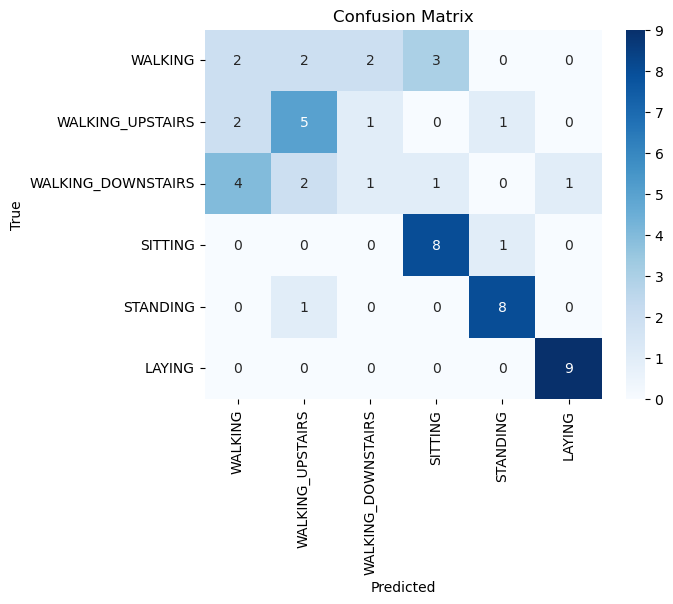

In [2]:
import seaborn as sns

print(X_train.shape)
print(X_train.reshape((X_train.shape[0], -1)).shape)

d_tree = DecisionTreeClassifier(random_state=42)
d_tree.fit(X_train.reshape((X_train.shape[0], -1)), y_train)


y_hat = d_tree.predict(X_test.reshape((X_test.shape[0], -1)))



accuracy1 = accuracy_score(y_test,y_hat)
precision1 = precision_score(y_test, y_hat, average='weighted')
recall1 = recall_score(y_test, y_hat, average='weighted')
print("Accuracy:",accuracy1)
print("Precision:",precision1)
print("recall:",recall1)

labels = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS","SITTING", "STANDING", "LAYING"]
conf_mat = confusion_matrix(y_test,y_hat)
sns.heatmap(conf_mat, annot=True,cmap='Blues',xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [17]:
X_train.shape

(126, 500, 3)

Train a decision tree model using the features obtained by TSFEL. Report the accuracy, precision, recall and confusion matrix of the model.

In [4]:
pip install tsfel

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.comNote: you may need to restart the kernel to use updated packages.



     accx_Absolute energy  accx_Area under the curve  accx_Autocorrelation  \
0              428.119592                   9.008919                   5.0   
1               32.768542                   2.553859                  26.0   
2              478.627177                   9.764364                   5.0   
3              477.002571                   9.495337                   5.0   
4              530.466450                  10.005161                   6.0   
..                    ...                        ...                   ...   
121            497.739114                   9.755190                   3.0   
122            340.897228                   8.207162                  84.0   
123             17.727040                   1.878521                  43.0   
124            430.187347                   9.028684                   5.0   
125            468.020212                   9.207634                   5.0   

     accx_Average power  accx_Centroid  accx_ECDF Percentile Co

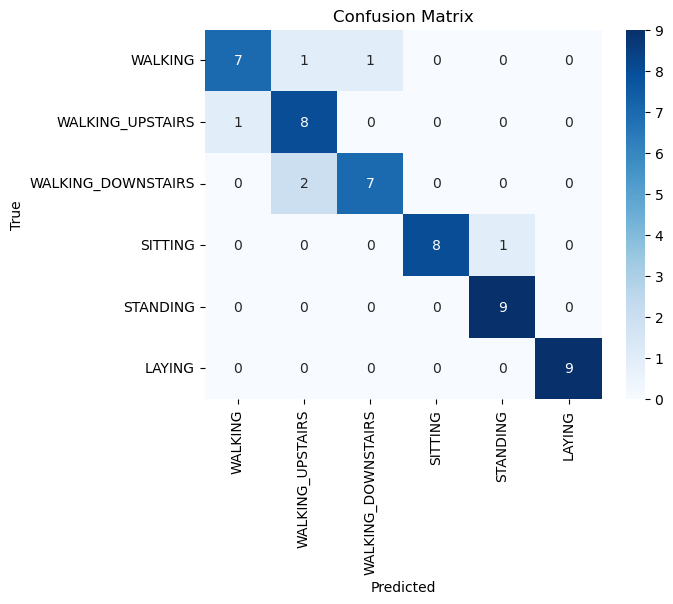

In [5]:
import tsfel
import seaborn as sns

def create_dataset(X,htz):
    cfg = tsfel.get_features_by_domain()
    features = []
    for acc in X:
        df = pd.DataFrame(acc, columns=['accx', 'accy', 'accz'])
        feats = tsfel.time_series_features_extractor(cfg, df, fs=htz, verbose=0)
        features.append(feats)
    return pd.concat(features).reset_index(drop=True)

X_train_tsfel = create_dataset(X_train,50)
X_test_tsfel = create_dataset(X_test,50)


print(X_train_tsfel)
tsfel_tree = DecisionTreeClassifier(random_state=42)


tsfel_tree.fit(X_train_tsfel,y_train)

y_hat_tsfel = tsfel_tree.predict(X_test_tsfel)


accuracy2 = accuracy_score(y_test,y_hat_tsfel)
precision2 = precision_score(y_test, y_hat_tsfel, average='weighted')
recall2 = recall_score(y_test, y_hat_tsfel, average='weighted')
print("Accuracy:",accuracy2)
print("Precision:",precision2)
print("recall:",recall2)

labels = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS","SITTING", "STANDING", "LAYING"]
conf_mat = confusion_matrix(y_test,y_hat_tsfel)
sns.heatmap(conf_mat, annot=True,cmap='Blues',xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



Train a decision tree model using the features provided in the dataset. Report the accuracy, precision, recall and confusion matrix of the model.

C:\Users\Asus\AppData\Local\Temp\ipykernel_37892\3957140208.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  input_train = pd.read_csv("./UCI HAR Dataset/train/X_train.txt",delim_whitespace=True, header=None)
C:\Users\Asus\AppData\Local\Temp\ipykernel_37892\3957140208.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  input_test = pd.read_csv("./UCI HAR Dataset/test/X_test.txt",delim_whitespace=True, header=None)
C:\Users\Asus\AppData\Local\Temp\ipykernel_37892\3957140208.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  output_train = pd.read_csv("./UCI HAR Dataset/train/y_train.txt",delim_whitespace=True, header=None)
C:\Users\Asus\AppData\Local\Temp\ipykernel_37892\3957140208.py:5: Future

Accuracy: 0.8622327790973872
Precision: 0.8632726592620287
recall: 0.8622327790973872


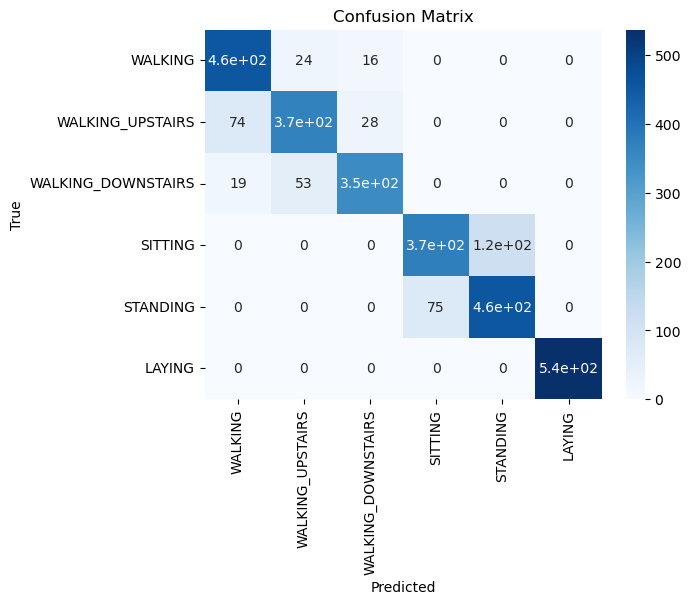

In [6]:
input_train = pd.read_csv("./UCI HAR Dataset/train/X_train.txt",delim_whitespace=True, header=None)
input_test = pd.read_csv("./UCI HAR Dataset/test/X_test.txt",delim_whitespace=True, header=None)

output_train = pd.read_csv("./UCI HAR Dataset/train/y_train.txt",delim_whitespace=True, header=None)
output_test = pd.read_csv("./UCI HAR Dataset/test/y_test.txt",delim_whitespace=True, header=None)

dataset_tree = DecisionTreeClassifier(random_state=42)
dataset_tree.fit(input_train,output_train)
y_hat_dataset = dataset_tree.predict(input_test)

accuracy3 = accuracy_score(output_test,y_hat_dataset)
precision3 = precision_score(output_test, y_hat_dataset, average='weighted')
recall3 = recall_score(output_test, y_hat_dataset, average='weighted')
print("Accuracy:",accuracy3)
print("Precision:",precision3)
print("recall:",recall3)

conf_mat = confusion_matrix(output_test,y_hat_dataset)
sns.heatmap(conf_mat, annot=True,cmap='Blues',xticklabels=labels,yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Compare the results of the three models. Which model do you think is better?


In [7]:
accuracy = [accuracy1,accuracy2,accuracy3]
precision = [precision1,precision2,precision3]
recall = [recall1,recall2,recall3]

rows = ["Raw accelerometer","TSFEL Features","HAR dataset features"]
df = pd.DataFrame({
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall
}, index=rows)

print(df)

                      Accuracy  Precision    Recall
Raw accelerometer     0.611111   0.561111  0.611111
TSFEL Features        0.888889   0.896212  0.888889
HAR dataset features  0.862233   0.863273  0.862233


model 2 i.e TSFEL is better when compared to the other two because of its highest precision, accuracy and recall

2) Train Decision Tree with varying depths (2-8) using all above 3 methods. Plot the accuracy of the model on test data vs the depth of the tree. [1 marks]

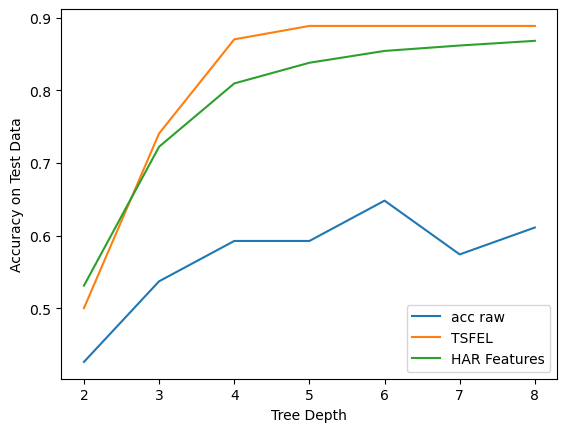

In [8]:

acc_raw, tsf, HAR_feat = [], [], []

X_train_raw = X_train.reshape((X_train.shape[0], -1))
X_test_raw  = X_test.reshape((X_test.shape[0], -1))

for d in range(2,9):
    # accelerometer raw
    d_tree = DecisionTreeClassifier(max_depth=d, random_state=42)
    d_tree.fit(X_train_raw, y_train)
    acc_raw.append(accuracy_score(y_test, d_tree.predict(X_test_raw)))

    # tsfel
    d_tree = DecisionTreeClassifier(max_depth=d, random_state=42)
    d_tree.fit(X_train_tsfel, y_train)
    tsf.append(accuracy_score(y_test, d_tree.predict(X_test_tsfel)))

    # HAR dataset features
    d_tree = DecisionTreeClassifier(max_depth=d, random_state=42)
    d_tree.fit(input_train, output_train)
    HAR_feat.append(accuracy_score(output_test, d_tree.predict(input_test)))


plt.plot(range(2,9), acc_raw, label="acc raw")
plt.plot(range(2,9), tsf, label="TSFEL")
plt.plot(range(2,9), HAR_feat, label="HAR Features")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy on Test Data")
plt.legend()
plt.show()

3) Are there any participants/ activitivies where the Model performace is bad? If Yes, Why? [0.5 mark]

Raw data:  model performance is bad in the case of sitting vs standing and walking vs stair activities since their accelerometer patterns are very similar 

TSFEL: few confusion when compared to raw data one. Overall the performance performs well except in some cases like walking vs stair activites. TSFEL might not capture every detail of the input

features: There is confusion in case of sitting,standing,walking, stair activities may be due to the the statistical features are not significantly useful enough for these closely related motions

TASK 3:  Data Collection in the Wild

1)  Use the Decision Tree model trained on the UCI-HAR dataset to predict the activities that you performed. Report the accuracy, precision, recall and confusion matrix of the model. You have three version of UCI dataset you can use a)Raw data from accelerometer, b)TSFEL featurised data, c)Features provided by author. Choose which version to use, ensuring that your test data is similar to your training data. How did the model perform?

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import os
import seaborn as sn

In [19]:
labels = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS","SITTING", "STANDING", "LAYING"]

X_rec,y_rec = [],[]

for label in labels:
    folder = f"./Recorded data/{label}"
    for file in os.listdir(folder):
        if file.endswith(".csv"):
            df = pd.read_csv(os.path.join(folder,file),sep=',',skiprows=1)
            df = df[['gFx', 'gFy', 'gFz']]
            df = df.iloc[:500]
            window_size = 500
            for i in range(0, len(df), window_size):
                window = df.iloc[i:i+window_size]
                if len(window) == window_size:
                    X_rec.append(window.values)
                    y_rec.append(label)

X_rec = np.array(X_rec)
y_rec = np.array(y_rec)

print(X_rec)
print(y_rec)

print("Collected dataset shape:", X_rec.shape, y_rec.shape)

[[[ 0.0698  0.2236  0.9769]
  [ 0.0552  0.2158  0.9842]
  [ 0.0537  0.2079  0.9994]
  ...
  [-0.0323  0.3975  0.9706]
  [-0.0362  0.4019  0.9701]
  [-0.0333  0.4058  0.9725]]

 [[ 0.1118  0.7601  0.5621]
  [ 0.1211  0.7694  0.5484]
  [ 0.1143  0.7659  0.5591]
  ...
  [ 0.0596  0.6702  0.6632]
  [ 0.0693  0.6731  0.6691]
  [ 0.0713  0.6716  0.6676]]

 [[ 0.192   0.6848  0.6989]
  [ 0.1602  0.6736  0.6803]
  [ 0.1348  0.7166  0.6466]
  ...
  [ 0.0317  0.6071  0.8679]
  [ 0.0229  0.6262  0.8172]
  [ 0.0248  0.6315  0.7971]]

 ...

 [[ 0.0928  0.8138 -0.615 ]
  [ 0.0791  0.8187 -0.5685]
  [ 0.0889  0.8133 -0.5685]
  ...
  [ 0.082   0.7694 -0.6433]
  [ 0.0801  0.7699 -0.6458]
  [ 0.083   0.7684 -0.6443]]

 [[ 0.0552  0.4185 -0.9218]
  [ 0.0645  0.4161 -0.9194]
  [ 0.0684  0.4141 -0.9194]
  ...
  [ 0.0082  0.7518 -0.6565]
  [ 0.0121  0.7528 -0.6697]
  [ 0.0214  0.7581 -0.6785]]

 [[-0.0607  0.5471 -0.9311]
  [-0.0186  0.551  -0.9126]
  [-0.0084  0.5656 -0.8969]
  ...
  [-0.0137  0.5177 -0.88

In [21]:
X_rec[0].shape

(500, 3)

In [ ]:
# window_size = 500
# for i in range(0, len(df), window_size):
#     window = df.iloc[i:i+window_size]
#     if len(window) == window_size:
#         X_rec.append(window.values)
#         y_rec.append(label)


AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [ ]:

y_pred_num = d_tree.predict(X_rec[0])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING'])

y_pred = le.inverse_transform(y_pred_num)


ValueError: X has 3 features, but DecisionTreeClassifier is expecting 561 features as input.

In [ ]:
X_rec_tsfel = create_dataset(X_rec,50)
y_hat_rec = tsfel_tree.predict(X_rec_tsfel)

print(y_hat_rec)

accuracy = accuracy_score(y_rec, y_hat_rec)

print(y_rec)

precision = precision_score(y_rec, y_hat_rec, average='weighted')
recall = recall_score(y_rec, y_hat_rec, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

conf_mat = confusion_matrix(y_rec, y_hat_rec)
sns.heatmap(conf_mat, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]
['WALKING' 'WALKING' 'WALKING' 'WALKING_UPSTAIRS' 'WALKING_UPSTAIRS'
 'WALKING_UPSTAIRS' 'WALKING_DOWNSTAIRS' 'WALKING_DOWNSTAIRS'
 'WALKING_DOWNSTAIRS' 'SITTING' 'SITTING' 'SITTING' 'STANDING' 'STANDING'
 'STANDING' 'LAYING' 'LAYING' 'LAYING']


ValueError: Mix of label input types (string and number)